In [1]:
import os.path
homedir = os.path.expanduser("~")
kaggle_home_dir = homedir + "/.kaggle"
kaggle_file = "kaggle.json"

kaggle_file = os.path.join(kaggle_home_dir, kaggle_file)
print(kaggle_file, type(kaggle_file), kaggle_file == '/home/iid/.kaggle/kaggle.json')

#!cat {kaggle_file}
#!pip install kaggle

!mkdir {kaggle_home_dir}
# !echo '{"username":"michalgasiorowski","key":"64ed31a01f3f866630e66b5427dd6682"}' > /root/.kaggle/kaggle.json
!echo '{"username":"michalgasiorowski","key":"64ed31a01f3f866630e66b5427dd6682"}' >  '/home/iid/.kaggle/kaggle.json'



/home/iid/.kaggle/kaggle.json <class 'str'> True
mkdir: cannot create directory ‘/home/iid/.kaggle’: File exists


In [18]:
#!kaggle competitions download -c titanic

In [2]:
# ! conda install -c anaconda seaborn 
import seaborn as sns

In [3]:
!ls

gender_submission.csv  sample_data  test.csv  train.csv


In [3]:
import os
import pandas as pd

def load_titanic_dateset(titanic_path='/content'):
  gender_submission_csv_path = os.path.join(titanic_path, "gender_submission.csv")
  train_csv_path = os.path.join(titanic_path, "train.csv")
  test_csv_path = os.path.join(titanic_path, "test.csv")
  return pd.read_csv(gender_submission_csv_path), pd.read_csv(train_csv_path), pd.read_csv(test_csv_path)
  #return pd.read_csv


In [14]:
gender_sub_df, train_df, test_df = load_titanic_dateset(titanic_path='/home/iid/PycharmProjects/ml-playground/data/titanic/')

In [15]:
train_df.describe(), train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


(       PassengerId    Survived      Pclass         Age       SibSp  \
 count   891.000000  891.000000  891.000000  714.000000  891.000000   
 mean    446.000000    0.383838    2.308642   29.699118    0.523008   
 std     257.353842    0.486592    0.836071   14.526497    1.102743   
 min       1.000000    0.000000    1.000000    0.420000    0.000000   
 25%     223.500000    0.000000    2.000000   20.125000    0.000000   
 50%     446.000000    0.000000    3.000000   28.000000    0.000000   
 75%     668.500000    1.000000    3.000000   38.000000    1.000000   
 max     891.000000    1.000000    3.000000   80.000000    8.000000   
 
             Parch        Fare  
 count  891.000000  891.000000  
 mean     0.381594   32.204208  
 std      0.806057   49.693429  
 min      0.000000    0.000000  
 25%      0.000000    7.910400  
 50%      0.000000   14.454200  
 75%      0.000000   31.000000  
 max      6.000000  512.329200  , None)

In [16]:
train_df["Ticket"].value_counts()

CA. 2343    7
1601        7
347082      7
3101295     6
347088      6
           ..
349208      1
PC 17599    1
367232      1
349243      1
2631        1
Name: Ticket, Length: 681, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f48987943d0>,
      dtype=object)

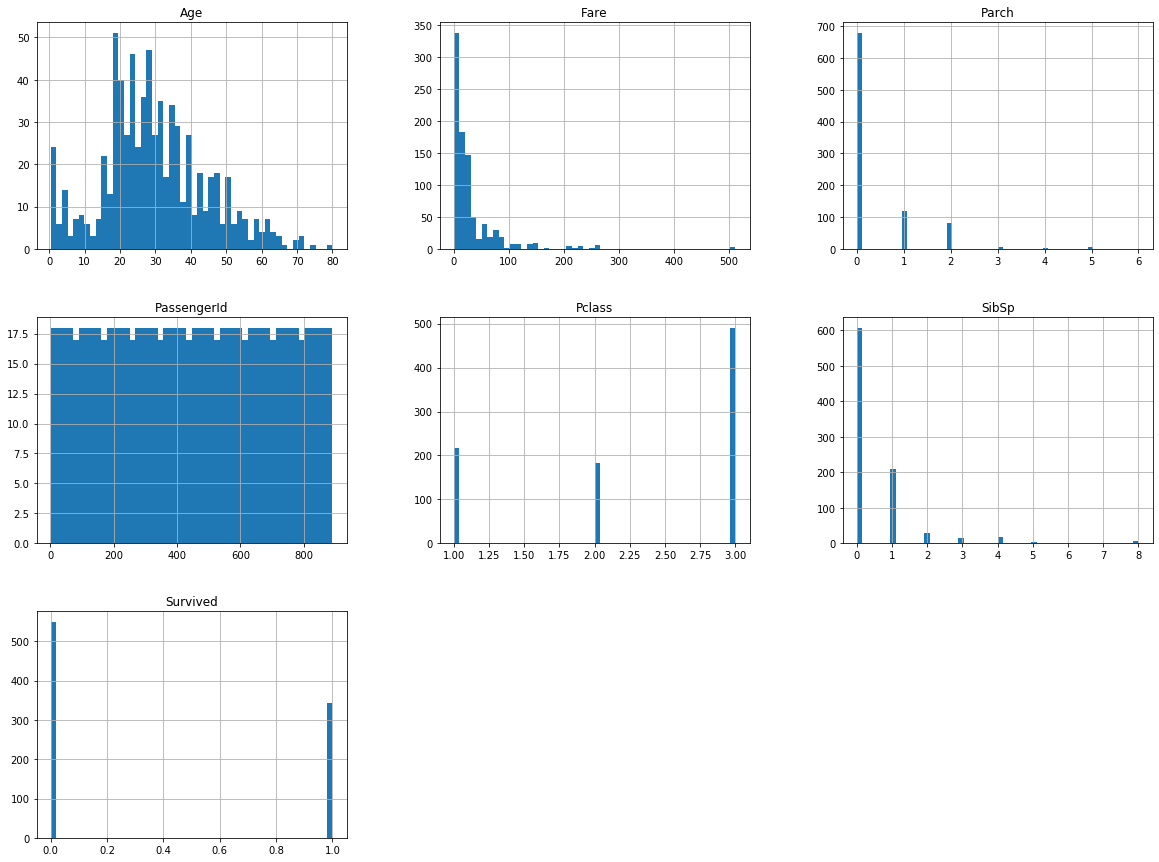

In [7]:
import matplotlib.pyplot as plt

train_df.hist(bins=50, figsize=(20,15))

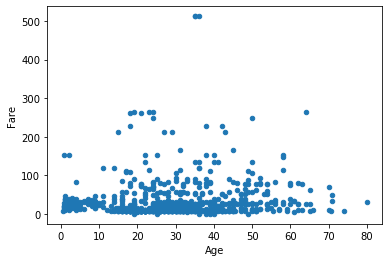

In [8]:
train_df.plot(kind="scatter", x="Age", y="Fare")

In [9]:
corr_matrix = train_df.corr()


In [10]:
# Survival is correlated to Fare price :) No shit sherlock :)
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3b4f188d68>,
      dtype=object)

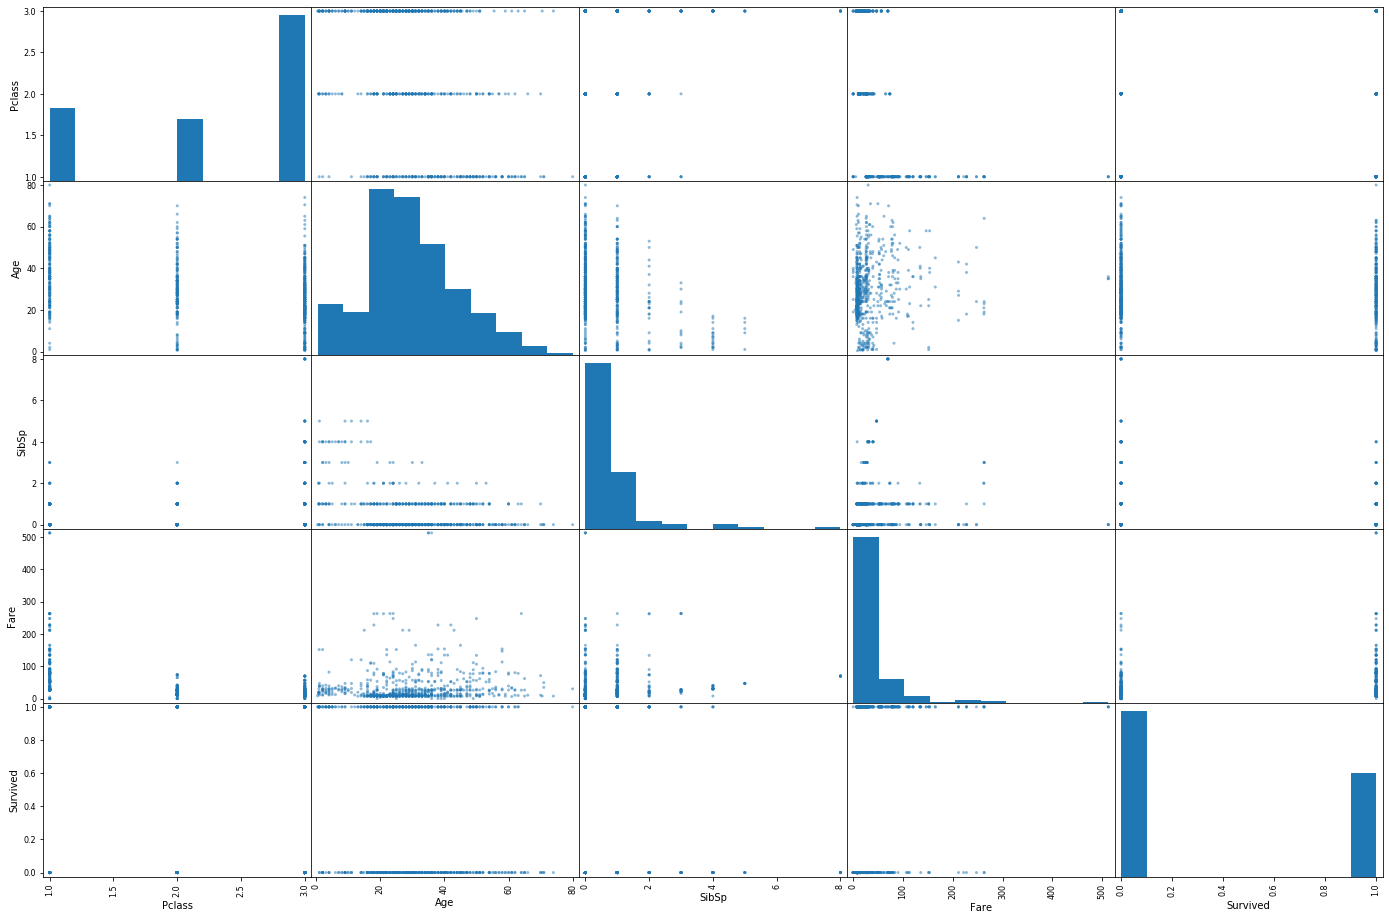

In [12]:
# PassengerId    891 non-null int64
# Survived       891 non-null int64
# Pclass         891 non-null int64
# Name           891 non-null object
# Sex            891 non-null object
# Age            714 non-null float64
# SibSp          891 non-null int64
# Parch          891 non-null int64
# Ticket         891 non-null object
# Fare           891 non-null float64
# Cabin          204 non-null object
# Embarked       889 non-null object

from pandas.plotting import scatter_matrix

attributes = ["Pclass", "Sex", "Age", "SibSp", "Fare", "Survived" ]
scatter_matrix(train[attributes], figsize=(24, 16))


In [0]:
train_df_data = train.drop("Survived", axis=1)
train_df_labels = train["Survived"].copy()

In [17]:
train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [0]:
# Categorical Attributes
# Missing Values
# Numerical attributes

nummerical_attributes = []
categorical_attributes = ["Pclass", "Sex", "Embarked"]
to_drop_attributes = ["Cabin", "Ticket", "Name"]

In [19]:
train['PassengerId'].is_unique

True

In [0]:
train.set_index("PassengerId", inplace=True)

In [12]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data = pd.concat([total, percent_2], axis=1, keys=['Total', '%'])
missing_data.head(5)

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [21]:
train_df["Cabin"]

0       NaN
1       C85
2       NaN
3      C123
4       NaN
       ... 
886     NaN
887     B42
888     NaN
889    C148
890     NaN
Name: Cabin, Length: 891, dtype: object

In [25]:
#sns.barplot(x='Pclass', y='Survived', data=train_df)
train_df['Ticket'].describe()

count          891
unique         681
top       CA. 2343
freq             7
Name: Ticket, dtype: object

In [90]:
train_df_prep, test_df_prep = train_df.copy(), test_df.copy()
data_prep = [train_df_prep, test_df_prep]

In [28]:
train_df_prep = train_df_prep.drop(["PassengerId"], axis=1)

In [91]:
#train_df_prep["Cabin"].value_counts()
import re

deckS = "ABCDEFGU"
deckNum = "12345678"
deckMap = dict(zip(deckS, deckNum))

reg = re.compile("([a-zA-Z]+)")

for prep_dataset in data_prep:
    prep_dataset["Cabin"] = prep_dataset["Cabin"].fillna("UO")
    prep_dataset["Deck"] = prep_dataset["Cabin"].map(lambda x: reg.search(x).group())
    prep_dataset["Deck"] = prep_dataset["Deck"].map(deckMap)
    prep_dataset["Deck"] = prep_dataset["Deck"].fillna(0)
    prep_dataset["Deck"] = prep_dataset["Deck"].astype(int)

train_df_prep["Deck"].value_counts(), test_df_prep["Deck"].value_counts()

(0    688
 3     59
 2     47
 4     33
 5     32
 1     15
 6     13
 7      4
 Name: Deck, dtype: int64, 0    327
 3     35
 2     18
 4     13
 5      9
 6      8
 1      7
 7      1
 Name: Deck, dtype: int64)

In [80]:
train_df_prep[["Sex"]]
#prep_dataset["Sex"]

,Sex
0,male
1,female
2,female
3,female
4,male
...,...
886,male
887,female
888,female
889,male


In [92]:
import numpy
from sklearn.preprocessing import OrdinalEncoder
sex_category_mapping = {'male' : 0, 'female' : 1}

#train_df_prep["Sex"]
ordinal_encoder = OrdinalEncoder(dtype=numpy.int32)

train_df_prep["Sex"] = ordinal_encoder.fit_transform(train_df_prep[["Sex"]])


In [93]:
train_df_prep[["Sex"]]

,Sex
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [79]:
#list(prep_dataset.select_dtypes(include ='float64'))
#prep_dataset["Sex"] = prep_dataset["Sex"].astype(int)
prep_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    int64  
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        418 non-null    object 
 10  Embarked     418 non-null    object 
 11  Deck         418 non-null    int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 39.3+ KB


In [41]:
import re

reg = re.compile("([a-zA-Z]+)")
ff = reg.search("C23").group()
print(ff, type(ff))

C <class 'str'>


In [0]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
 ('imputer')                        
])

In [0]:
from sklearn.compose import ColumnTransformer

nummerical_attributes = 
#num_pipeline 